# data

In [7]:
import numpy as np
import pickle
with open('/home/ubuntu/gangmin/tsvt/multimodal/data/video_frames.pickle',"rb") as f:
    video_frames = pickle.load(f)

In [8]:
import numpy as np
import pickle
with open('/home/ubuntu/gangmin/tsvt/multimodal/data/audio_frames.pickle',"rb") as f:
    audio_frames = pickle.load(f)

In [9]:
with open('/home/ubuntu/gangmin/tsvt/multimodal/data/chat_frames.pickle','rb') as f:
    chat_frames = pickle.load(f)

# label

In [10]:
import numpy as np
import pickle
import copy
with open('/home/ubuntu/gangmin/tsvt/multimodal/label/label.pickle',"rb") as f:
    label = pickle.load(f)

# MLP

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import adam
import pandas as pd
import numpy as np

In [14]:
'''
직렬
X={}
for key in video_frames.keys():
    X[key] = pd.concat([pd.Series(video_frames[key]),pd.Series(audio_frames[key]),pd.Series(chat_frames[key])],axis=0)
    X[key] = X[key].reset_index()
    X[key] = X[key].drop('index',axis=1)
'''

"\n직렬\nX={}\nfor key in video_frames.keys():\n    X[key] = pd.concat([pd.Series(video_frames[key]),pd.Series(audio_frames[key]),pd.Series(chat_frames[key])],axis=0)\n    X[key] = X[key].reset_index()\n    X[key] = X[key].drop('index',axis=1)\n"

In [132]:
labeL = pd.DataFrame(columns=['highlight'])
for key in label.keys():
    temp = pd.DataFrame()
    temp['highlight'] = label[key]
    
    labeL = pd.concat([labeL,temp],axis=0)
    
labeL = labeL.reset_index()
labeL = labeL.drop('index',axis=1)

In [46]:
# 병렬
X_p={}
for key in video_frames.keys():
    temp = pd.DataFrame(columns=['video','audio','chat'])
    temp['video'] = video_frames[key]
    temp['audio'] = audio_frames[key]
    temp['chat'] = chat_frames[key]
    X_p[key] = temp
    

In [54]:
X = pd.DataFrame(columns=['video','audio','chat'])

for key in video_frames.keys():
    X = pd.concat([X,X_p[key]],axis=0)

X = X.reset_index()
X = X.drop('index',axis=1)
X

,video,audio,chat
0,0.0,1.0,0
1,0.0,1.0,0
2,0.0,1.0,0
3,0.0,1.0,0
4,0.0,1.0,0
...,...,...,...
225586,1.0,0.0,1
225587,1.0,1.0,1
225588,1.0,0.0,1
225589,1.0,0.0,1


In [61]:
y_p = label
y = pd.DataFrame(columns = ['highlight'])
for key in video_frames.keys():
    temp = pd.DataFrame()
    temp['highlight'] = y_p[key]
    y = pd.concat([y,temp],axis=0)
y = y.reset_index()
y = y.drop('index',axis=1)
y
    

,highlight
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
225586,1.0
225587,1.0
225588,1.0
225589,1.0


In [115]:
#stratified shuffle spit

from sklearn.model_selection import StratifiedShuffleSplit
seed = 10
shufflesplit = StratifiedShuffleSplit(n_splits=100,random_state=seed,test_size=0.3)
print(shufflesplit)

for train_index ,test_index in shufflesplit.split(X,y):
    train_x = X.loc[train_index]
    test_x = X.loc[test_index]
    train_y = y.loc[train_index]
    test_y = y.loc[test_index]

StratifiedShuffleSplit(n_splits=100, random_state=10, test_size=0.3,
            train_size=None)


In [77]:
#build model
model = Sequential()
model.add(Dense(128, input_shape=(3,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [78]:
from keras.callbacks import ModelCheckpoint
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint(filepath='/home/ubuntu/gangmin/tsvt/multimodal/MLP_models/'+'{epoch:02d}-{val_loss:.4f}.hdf5',monitor = 'val_loss',verbose=1,save_best_only=True)


In [79]:
history = model.fit(train_x,train_y,epochs=300,batch_size=128,verbose=1,validation_data=[test_x,test_y],callbacks=[checkpoint])

Train on 157913 samples, validate on 67678 samples
Epoch 1/300
157913/157913 [==============================] - 4s 25us/step - loss: 0.3517 - accuracy: 0.8543 - val_loss: 0.3398 - val_accuracy: 0.8556

Epoch 00001: val_loss improved from inf to 0.33980, saving model to /home/ubuntu/gangmin/tsvt/multimodal/MLP_models/01-0.3398.hdf5
Epoch 2/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3408 - accuracy: 0.8563 - val_loss: 0.3403 - val_accuracy: 0.8556

Epoch 00002: val_loss did not improve from 0.33980
Epoch 3/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3398 - accuracy: 0.8569 - val_loss: 0.3411 - val_accuracy: 0.8556

Epoch 00003: val_loss did not improve from 0.33980
Epoch 4/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3393 - accuracy: 0.8574 - val_loss: 0.3398 - val_accuracy: 0.8556

Epoch 00004: val_loss improved from 0.33980 to 0.33977, saving model to /home/ubuntu/gangmin/tsvt/multimodal/MLP

157913/157913 [==============================] - 4s 24us/step - loss: 0.3387 - accuracy: 0.8571 - val_loss: 0.3398 - val_accuracy: 0.8556

Epoch 00038: val_loss did not improve from 0.33960
Epoch 39/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3386 - accuracy: 0.8570 - val_loss: 0.3398 - val_accuracy: 0.8556

Epoch 00039: val_loss did not improve from 0.33960
Epoch 40/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3386 - accuracy: 0.8570 - val_loss: 0.3400 - val_accuracy: 0.8556

Epoch 00040: val_loss did not improve from 0.33960
Epoch 41/300
157913/157913 [==============================] - 4s 25us/step - loss: 0.3385 - accuracy: 0.8568 - val_loss: 0.3398 - val_accuracy: 0.8556

Epoch 00041: val_loss did not improve from 0.33960
Epoch 42/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3381 - accuracy: 0.8569 - val_loss: 0.3397 - val_accuracy: 0.8556

Epoch 00042: val_loss did not improve from 0.3396

157913/157913 [==============================] - 4s 24us/step - loss: 0.3388 - accuracy: 0.8573 - val_loss: 0.3398 - val_accuracy: 0.8556

Epoch 00078: val_loss did not improve from 0.33958
Epoch 79/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3382 - accuracy: 0.8575 - val_loss: 0.3400 - val_accuracy: 0.8556

Epoch 00079: val_loss did not improve from 0.33958
Epoch 80/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3387 - accuracy: 0.8573 - val_loss: 0.3397 - val_accuracy: 0.8556

Epoch 00080: val_loss did not improve from 0.33958
Epoch 81/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3383 - accuracy: 0.8573 - val_loss: 0.3400 - val_accuracy: 0.8556

Epoch 00081: val_loss did not improve from 0.33958
Epoch 82/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3385 - accuracy: 0.8570 - val_loss: 0.3398 - val_accuracy: 0.8556

Epoch 00082: val_loss did not improve from 0.3395

157913/157913 [==============================] - 4s 23us/step - loss: 0.3388 - accuracy: 0.8567 - val_loss: 0.3400 - val_accuracy: 0.8556

Epoch 00118: val_loss did not improve from 0.33958
Epoch 119/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3387 - accuracy: 0.8572 - val_loss: 0.3401 - val_accuracy: 0.8556

Epoch 00119: val_loss did not improve from 0.33958
Epoch 120/300
157913/157913 [==============================] - 4s 23us/step - loss: 0.3389 - accuracy: 0.8574 - val_loss: 0.3406 - val_accuracy: 0.8556

Epoch 00120: val_loss did not improve from 0.33958
Epoch 121/300
157913/157913 [==============================] - 4s 23us/step - loss: 0.3387 - accuracy: 0.8572 - val_loss: 0.3408 - val_accuracy: 0.8556

Epoch 00121: val_loss did not improve from 0.33958
Epoch 122/300
157913/157913 [==============================] - 4s 23us/step - loss: 0.3388 - accuracy: 0.8573 - val_loss: 0.3398 - val_accuracy: 0.8556

Epoch 00122: val_loss did not improve from 0.

157913/157913 [==============================] - 4s 24us/step - loss: 0.3388 - accuracy: 0.8571 - val_loss: 0.3397 - val_accuracy: 0.8556

Epoch 00158: val_loss did not improve from 0.33956
Epoch 159/300
157913/157913 [==============================] - 4s 25us/step - loss: 0.3387 - accuracy: 0.8572 - val_loss: 0.3396 - val_accuracy: 0.8556

Epoch 00159: val_loss did not improve from 0.33956
Epoch 160/300
157913/157913 [==============================] - 4s 25us/step - loss: 0.3392 - accuracy: 0.8569 - val_loss: 0.3401 - val_accuracy: 0.8556

Epoch 00160: val_loss did not improve from 0.33956
Epoch 161/300
157913/157913 [==============================] - 4s 25us/step - loss: 0.3390 - accuracy: 0.8572 - val_loss: 0.3396 - val_accuracy: 0.8556

Epoch 00161: val_loss did not improve from 0.33956
Epoch 162/300
157913/157913 [==============================] - 4s 25us/step - loss: 0.3387 - accuracy: 0.8575 - val_loss: 0.3400 - val_accuracy: 0.8556

Epoch 00162: val_loss did not improve from 0.

157913/157913 [==============================] - 4s 23us/step - loss: 0.3391 - accuracy: 0.8574 - val_loss: 0.3399 - val_accuracy: 0.8556

Epoch 00198: val_loss did not improve from 0.33956
Epoch 199/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3388 - accuracy: 0.8574 - val_loss: 0.3399 - val_accuracy: 0.8556

Epoch 00199: val_loss did not improve from 0.33956
Epoch 200/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3387 - accuracy: 0.8573 - val_loss: 0.3404 - val_accuracy: 0.8556

Epoch 00200: val_loss did not improve from 0.33956
Epoch 201/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3386 - accuracy: 0.8576 - val_loss: 0.3422 - val_accuracy: 0.8485

Epoch 00201: val_loss did not improve from 0.33956
Epoch 202/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3386 - accuracy: 0.8578 - val_loss: 0.3400 - val_accuracy: 0.8556

Epoch 00202: val_loss did not improve from 0.

157913/157913 [==============================] - 4s 23us/step - loss: 0.3388 - accuracy: 0.8576 - val_loss: 0.3403 - val_accuracy: 0.8556

Epoch 00238: val_loss did not improve from 0.33956
Epoch 239/300
157913/157913 [==============================] - 4s 23us/step - loss: 0.3387 - accuracy: 0.8577 - val_loss: 0.3402 - val_accuracy: 0.8556

Epoch 00239: val_loss did not improve from 0.33956
Epoch 240/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3384 - accuracy: 0.8580 - val_loss: 0.3406 - val_accuracy: 0.8556

Epoch 00240: val_loss did not improve from 0.33956
Epoch 241/300
157913/157913 [==============================] - 4s 23us/step - loss: 0.3391 - accuracy: 0.8575 - val_loss: 0.3402 - val_accuracy: 0.8556

Epoch 00241: val_loss did not improve from 0.33956
Epoch 242/300
157913/157913 [==============================] - 4s 23us/step - loss: 0.3388 - accuracy: 0.8571 - val_loss: 0.3408 - val_accuracy: 0.8556

Epoch 00242: val_loss did not improve from 0.

157913/157913 [==============================] - 4s 23us/step - loss: 0.3385 - accuracy: 0.8574 - val_loss: 0.3418 - val_accuracy: 0.8403

Epoch 00278: val_loss did not improve from 0.33956
Epoch 279/300
157913/157913 [==============================] - 4s 25us/step - loss: 0.3386 - accuracy: 0.8575 - val_loss: 0.3407 - val_accuracy: 0.8556

Epoch 00279: val_loss did not improve from 0.33956
Epoch 280/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3387 - accuracy: 0.8583 - val_loss: 0.3427 - val_accuracy: 0.8403

Epoch 00280: val_loss did not improve from 0.33956
Epoch 281/300
157913/157913 [==============================] - 4s 23us/step - loss: 0.3387 - accuracy: 0.8570 - val_loss: 0.3414 - val_accuracy: 0.8485

Epoch 00281: val_loss did not improve from 0.33956
Epoch 282/300
157913/157913 [==============================] - 4s 24us/step - loss: 0.3387 - accuracy: 0.8575 - val_loss: 0.3424 - val_accuracy: 0.8403

Epoch 00282: val_loss did not improve from 0.

In [80]:
history_dict = history.history
import matplotlib.pyplot as plt

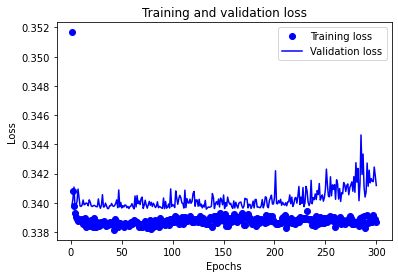

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


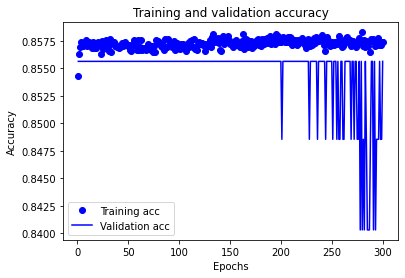

In [82]:
plt.clf()

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [84]:
from keras.models import load_model
model_best = load_model('/home/ubuntu/gangmin/tsvt/multimodal/MLP_models/62-0.3396.hdf5')

In [85]:
y_predict = model_best.predict(test_x)

In [86]:
y_predict

array([[0.07149449],
       [0.06018311],
       [0.06018311],
       ...,
       [0.56292415],
       [0.07149448],
       [0.56292415]], dtype=float32)

# evaluation

In [98]:
result = np.zeros(len(y_predict))
for i,v in enumerate(y_predict):
    if v[0] >= 0.5:
        result[i] = 1
    else:
        result[i] = 0

In [121]:
test_x = test_x.reset_index()

In [124]:
test_x.iloc[[0]]['index'][0]

34123

In [168]:
test_x.iloc[[67677]]['index'].values[0]

206854

In [169]:
average = [0,0,0,0,0]

TP = 0
FP = 0
TN = 0
FN = 0


for i,v in enumerate(y_predict):
    if int(labeL.iloc[test_x.iloc[[i]]['index'].values[0]][0]) ==1 & int(result[i]) ==1 :
        TP += 1
    elif int(labeL.iloc[test_x.iloc[[i]]['index'].values[0]][0]) ==1 & int(result[i]) ==0 :
        FP += 1
    elif int(labeL.iloc[test_x.iloc[[i]]['index'].values[0]][0]) ==0 & int(result[i]) ==1 :
        TN += 1
    else:
        FN += 1

    
precision = TP/(TP+FP)
recall = TP/(TP+FN)
accuracy = (TP+TN) / (TP+FN+FP+TN)


f1 = (2*precision*recall / (precision + recall))

print('precision : {}, recall : {}, f1 : {}, accuracy : {}'.format(precision,recall,f1,accuracy))
average[0]+= precision
average[1] += recall
average[2] += f1
average[3] += accuracy
average[4]+=1

precision : 0.05469676390056702, recall : 0.1064535078885532, f1 : 0.07226376130456455, accuracy : 0.037486332338426076


In [170]:
print('precision : {}, recall : {}, f1 : {}, accuracy : {}'.format(average[0]/average[4],average[1]/average[4],average[2]/average[4],average[3]/average[4]))

precision : 0.05469676390056702, recall : 0.1064535078885532, f1 : 0.07226376130456455, accuracy : 0.037486332338426076
